**Code for LO1: Understanding Machine Learning Concepts for Fraud Detection**

Step 1: Load and Explore the Dataset

In [ ]:
import pandas as pd

# Load the dataset
file_path = "PS_20174392719_1491204439457_log.csv"  # Update with your dataset path
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

# Display the first few rows of the dataset
print(df.head())

# Check for missing values and dataset statistics
print(df.info())
print(df.describe())


   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 11 column

Step 2: Data Preprocessing

In [ ]:
# Dropping irrelevant columns (if applicable)
df.drop(columns=['nameOrig', 'nameDest'], inplace=True)

# Encode transaction types as numerical values
df['type'] = df['type'].astype('category').cat.codes

# Check for missing values
print("Missing values:", df.isnull().sum())

# Check for class imbalance in the target column 'isFraud'
print(df['isFraud'].value_counts(normalize=True))


Missing values: step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64
isFraud
0.0    0.998827
1.0    0.001173
Name: proportion, dtype: float64


Step 3: Feature Selection and Splitting Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# ... (your previous code for loading and preprocessing data) ...

# Define features (X) and target (y)
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Handle missing values in 'y' (e.g., by dropping rows with NaN or imputing values)
# Option 1: Drop rows with NaN in 'isFraud'
# df.dropna(subset=['isFraud'], inplace=True)
# X = df.drop(columns=['isFraud'])
# y = df['isFraud']

# Option 2: Impute missing values with a specific value (e.g., 0)
y.fillna(0, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (68057, 8)
Testing set size: (29168, 8)


Step 4: Training Machine Learning Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Display classification metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     29134
         1.0       1.00      0.29      0.45        34

    accuracy                           1.00     29168
   macro avg       1.00      0.65      0.73     29168
weighted avg       1.00      1.00      1.00     29168

Confusion Matrix:
 [[29134     0]
 [   24    10]]


Code for LO2: Creating Fraud Detection Reports and

In [ ]:
# Save the preprocessed data to a CSV file for Tableau visualization
df.to_csv("fraud_detection_data.csv", index=False)
print("Dataset saved for Tableau visualization.")


Dataset saved for Tableau visualization.


<ipython-input-12-5dedd7c318c7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


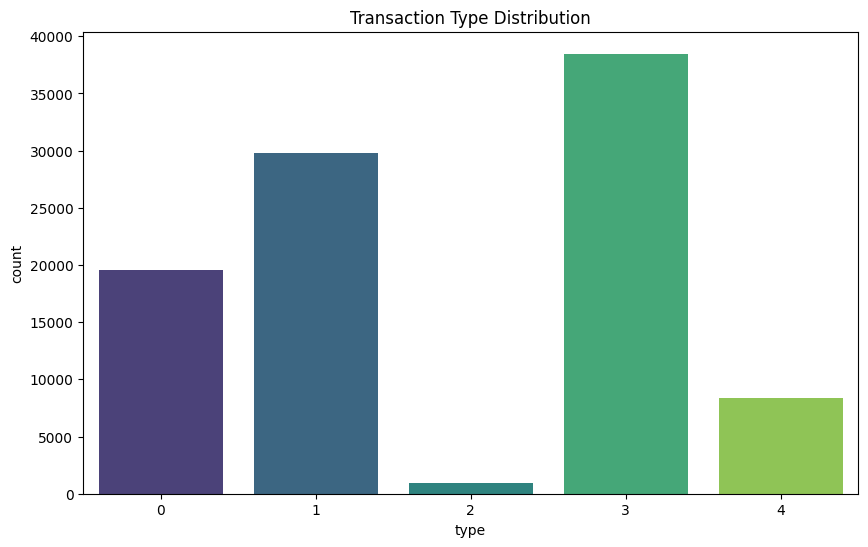

<ipython-input-12-5dedd7c318c7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=df, palette='viridis')


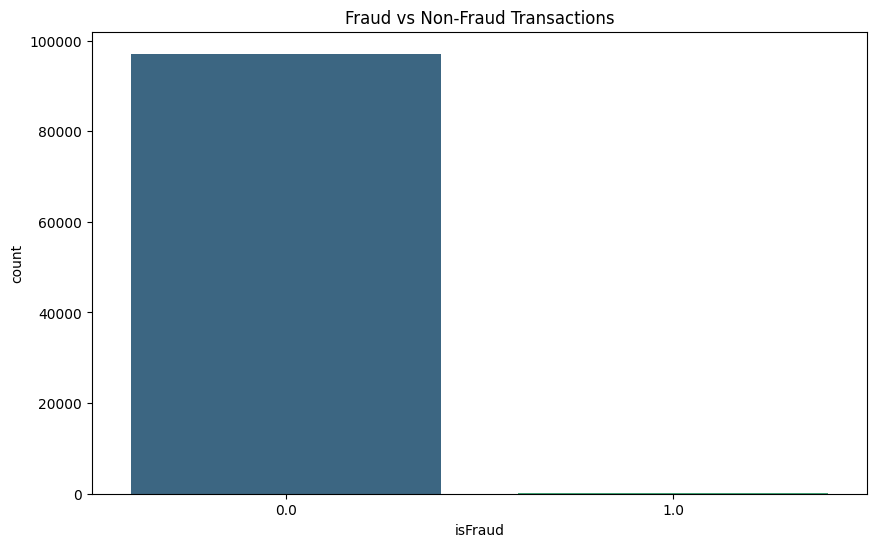

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title("Transaction Type Distribution")
plt.show()

# Visualize the class imbalance in the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='isFraud', data=df, palette='viridis')
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


In [ ]:
# Create aggregated summaries
summary = df.groupby('type')['amount'].sum().reset_index()
summary.to_csv("transaction_summary.csv", index=False)
print("Transaction summary saved for Tableau.")


Transaction summary saved for Tableau.


<ipython-input-15-5399db406c4b>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




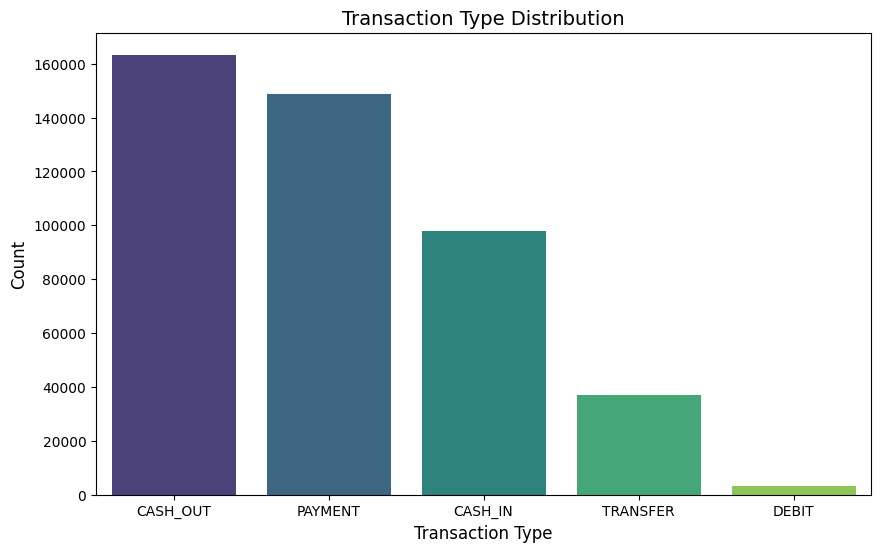

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

# Analyze transaction types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
plt.title('Transaction Type Distribution', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [16]:
# Filter relevant columns
prepared_data = df[['step', 'type', 'amount', 'isFraud', 'isFlaggedFraud']]

# Add time conversion (assuming 'step' is in hours)
prepared_data['day'] = prepared_data['step'] // 24

# Export prepared data for Tableau
prepared_data.to_csv('prepared_fraud_data.csv', index=False)

print("Data prepared and saved as 'prepared_fraud_data.csv'")


<ipython-input-16-19aef15ac1be>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Data prepared and saved as 'prepared_fraud_data.csv'


<ipython-input-17-5c1b86d28ac5>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




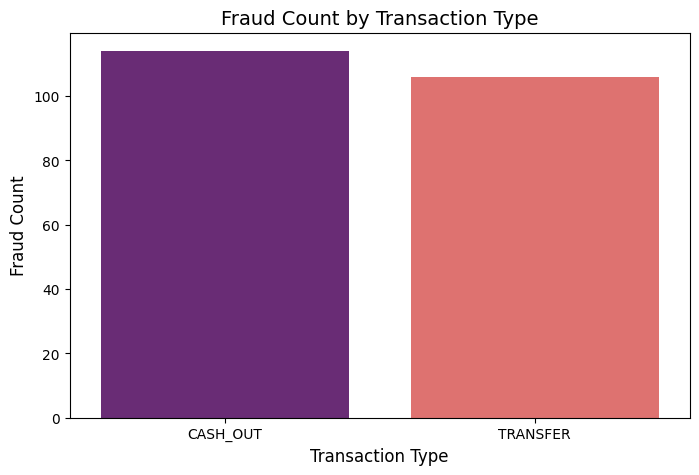

In [17]:
fraud_by_type = df[df['isFraud'] == 1].groupby('type').size().reset_index(name='Fraud Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=fraud_by_type, x='type', y='Fraud Count', palette='magma')
plt.title('Fraud Count by Transaction Type', fontsize=14)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Fraud Count', fontsize=12)
plt.show()


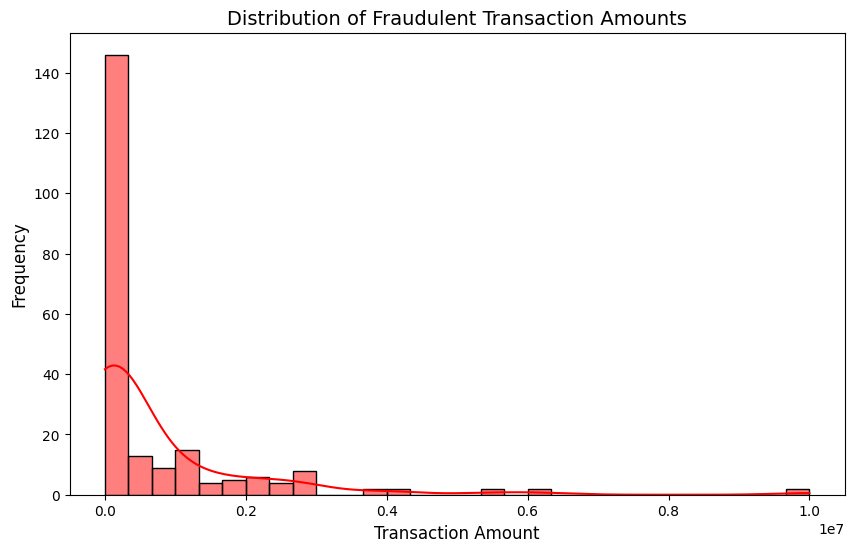

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['isFraud'] == 1]['amount'], bins=30, kde=True, color='red')
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [19]:
# Aggregate fraud metrics
summary_metrics = df.groupby('type').agg({
    'isFraud': 'sum',
    'amount': 'mean'
}).rename(columns={'isFraud': 'Total Frauds', 'amount': 'Avg Transaction Amount'})

# Export metrics for Tableau dashboard
summary_metrics.to_csv('fraud_summary_metrics.csv', index=True)

print("Summary metrics saved as 'fraud_summary_metrics.csv'")


Summary metrics saved as 'fraud_summary_metrics.csv'


In [20]:
import plotly.express as px

# Fraud Count by Day
fraud_per_day = df[df['isFraud'] == 1].groupby(df['step'] // 24).size().reset_index(name='Fraud Count')
fraud_per_day.columns = ['Day', 'Fraud Count']

fig = px.line(fraud_per_day, x='Day', y='Fraud Count', title="Fraud Count by Day",
              labels={'Day': 'Day', 'Fraud Count': 'Count'}, markers=True)
fig.show()


In [21]:
# Prepare a sample case study of fraudulent transactions
case_study = df[df['isFraud'] == 1].head(50)  # First 50 fraud cases

# Save the case study data
case_study.to_csv('fraud_case_study.csv', index=False)

print("Case study saved as 'fraud_case_study.csv'")


Case study saved as 'fraud_case_study.csv'


**Code for LO3: Integrating Machine Learning and Visualization for Storytelling and Prescriptive Analytics**

In [ ]:
# Calculate feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame of feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Save feature importances for Tableau
importance_df.to_csv("feature_importance.csv", index=False)
print("Feature importance saved for Tableau.")


Feature importance saved for Tableau.


In [ ]:
# Analyze high-importance features
top_features = importance_df.head(5)
print("Top features for fraud detection:\n", top_features)

# Example: Identify high-risk transactions based on these features
high_risk = df[df['amount'] > 100000]  # Adjust based on insights
print("High-risk transactions:\n", high_risk.head())

# Save high-risk transactions for Tableau
high_risk.to_csv("high_risk_transactions.csv", index=False)
print("High-risk transactions saved for Tableau.")


Top features for fraud detection:
           Feature  Importance
2          amount    0.272340
3   oldbalanceOrg    0.217657
6  newbalanceDest    0.179741
5  oldbalanceDest    0.170038
0            step    0.075989
High-risk transactions:
     step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
15     1     1  229133.94       15325.00            0.00          5083.0   
19     1     4  215310.30         705.00            0.00         22425.0   
24     1     4  311685.89       10835.00            0.00          6267.0   
42     1     1  110414.71       26845.41            0.00        288800.0   
71     1     1  136872.92      162075.98        25203.05        217806.0   

    newbalanceDest  isFraud  isFlaggedFraud  
15        51513.44      0.0             0.0  
19            0.00      0.0             0.0  
24      2719172.89      0.0             0.0  
42         2415.16      0.0             0.0  
71            0.00      0.0             0.0  
High-risk transactions save

In [5]:
# Check for null values
import pandas as pd # Import pandas

# Load the dataset
file_path = "PS_20174392719_1491204439457_log.csv"  # Update with your dataset path
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv") # Load the dataframe

print("Missing values:\n", df.isnull().sum())

# Convert necessary columns to appropriate types
df['amount'] = df['amount'].astype(float)
# Convert 'isFraud' to integers, handling non-finite values
df['isFraud'] = pd.to_numeric(df['isFraud'], errors='coerce').astype('Int64') #Changed to handle NA and inf values

# Filter the fraudulent transactions
fraud_data = df[df['isFraud'] == 1]
non_fraud_data = df[df['isFraud'] == 0]

Missing values:
 step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


<ipython-input-6-d60c3ea17beb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)


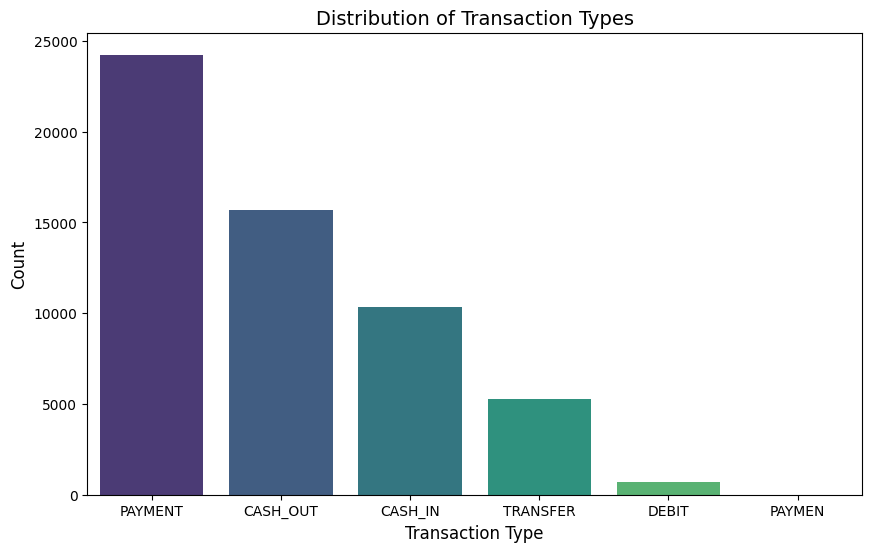

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)
plt.title("Distribution of Transaction Types", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-7-d60c3ea17beb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)


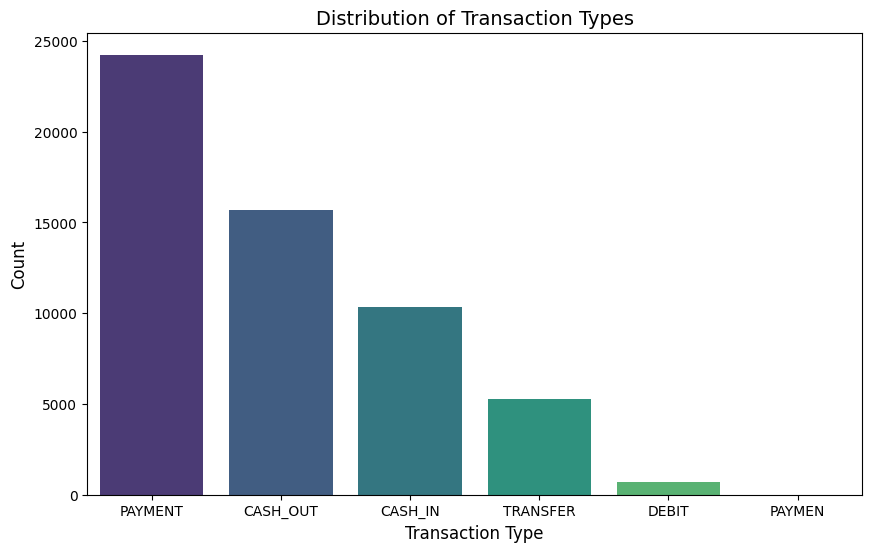

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', palette='viridis', order=df['type'].value_counts().index)
plt.title("Distribution of Transaction Types", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


<ipython-input-8-4c7eced58817>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fraud_data, x='type', palette='magma', order=fraud_data['type'].value_counts().index)


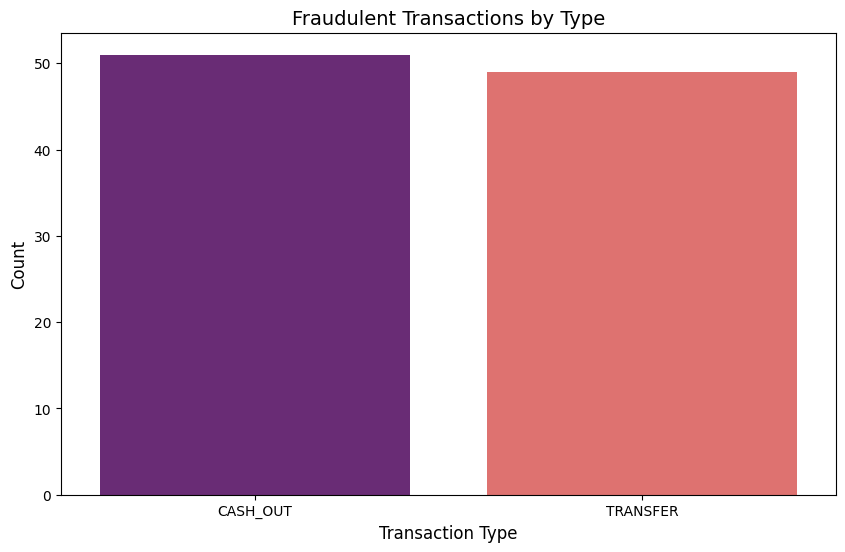

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=fraud_data, x='type', palette='magma', order=fraud_data['type'].value_counts().index)
plt.title("Fraudulent Transactions by Type", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


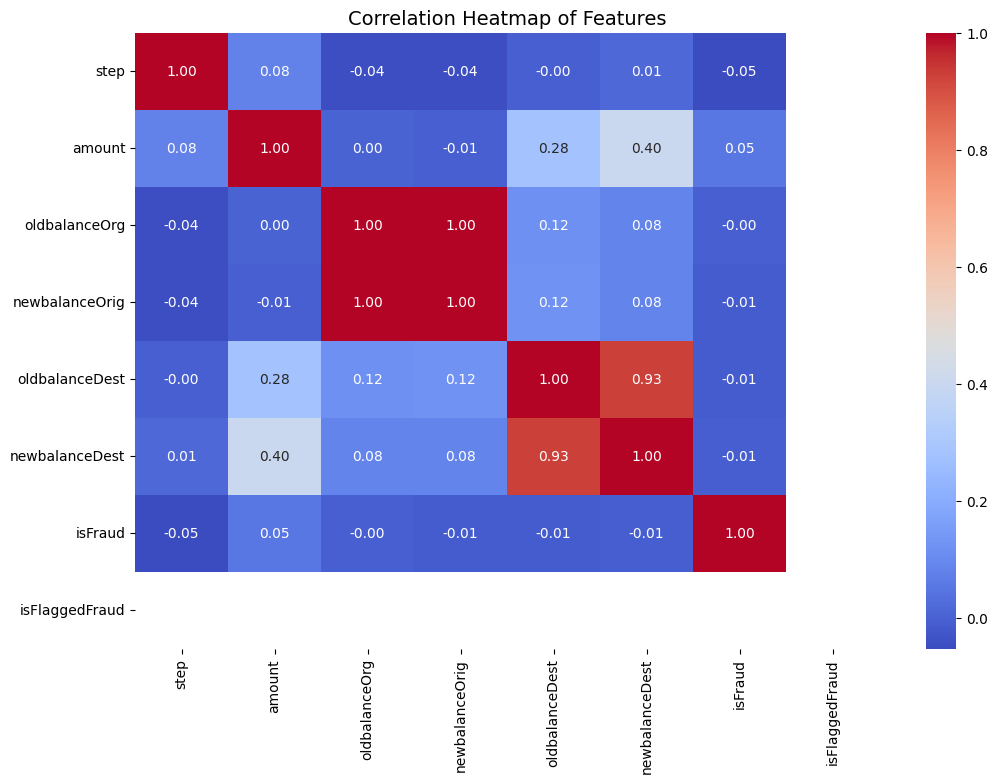

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix using the numerical features
correlation = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

<ipython-input-11-a3a3bde3e616>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type', y='amount', showfliers=False, palette='Set2')


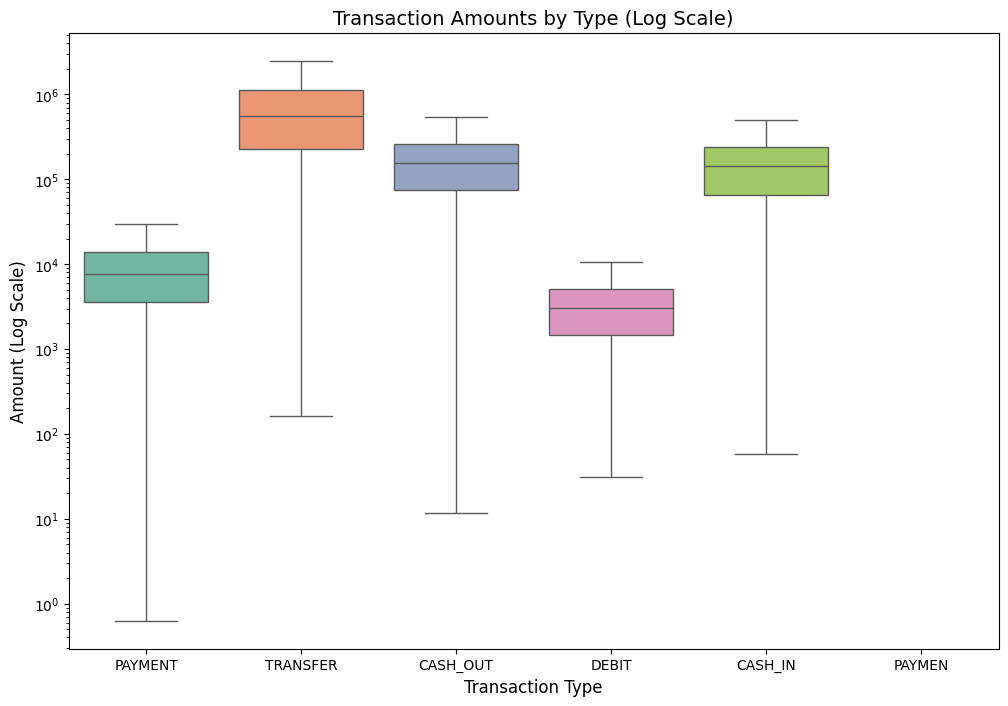

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='type', y='amount', showfliers=False, palette='Set2')
plt.yscale('log')  # Log scale for better visualization
plt.title("Transaction Amounts by Type (Log Scale)", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Amount (Log Scale)", fontsize=12)
plt.show()


<ipython-input-12-c00585de1246>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=fraud_data['amount'], label='Fraud', shade=True, color='red')
<ipython-input-12-c00585de1246>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=non_fraud_data['amount'], label='Non-Fraud', shade=True, color='green')


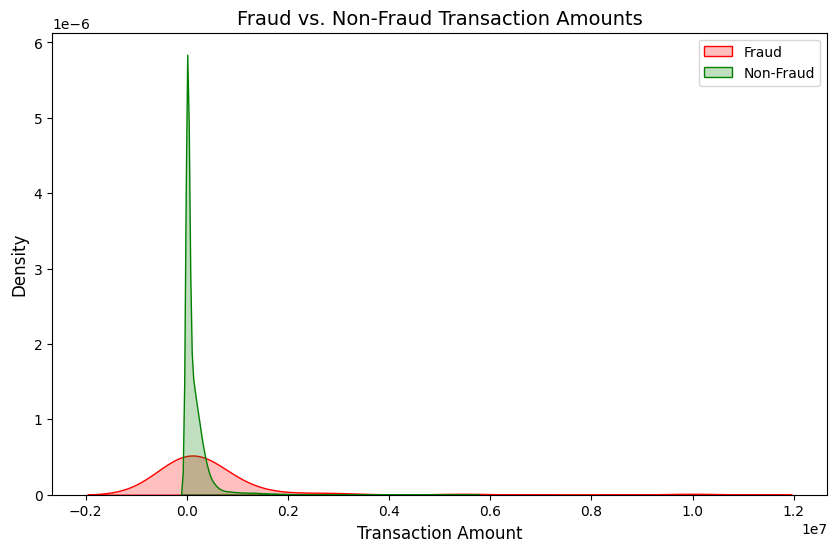

In [12]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fraud_data['amount'], label='Fraud', shade=True, color='red')
sns.kdeplot(data=non_fraud_data['amount'], label='Non-Fraud', shade=True, color='green')
plt.title("Fraud vs. Non-Fraud Transaction Amounts", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()


In [13]:
import plotly.express as px

# Create a fraud count per day
df['day'] = df['step'] // 24  # Assuming 'step' represents hours
fraud_per_day = df[df['isFraud'] == 1].groupby('day').size().reset_index(name='Fraud Count')

fig = px.bar(fraud_per_day, x='day', y='Fraud Count', title="Fraud Count by Day",
             labels={'day': 'Day', 'Fraud Count': 'Count'}, color='Fraud Count')
fig.show()
